<a href="https://colab.research.google.com/github/meheroob/heart-disease-detection/blob/main/Heart_disease_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_dataset.csv to heart_disease_dataset (3).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['heart_disease_dataset.csv']))

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
xs = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
         'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]

Arranging data into 2D numpy array for training

In [ ]:
xs

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
ys = df['target']

In [ ]:
ys

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

The dataset attributes are listed as below: 13 attributes +1 target
1.	age: The person's age in years
2.	sex: The person's sex (1 = male, 0 = female)
3.	cp: Chest pain in 4 values (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic)
4.	trestbps: Resting blood pressure 
5.	chol: Cholesterol measurement in mg/dl
6.	fbs: Fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7.	restecg: Resting electrocardiographic measurement (0 = normal, 1 = ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8.	thalach: Maximum heart rate achieved
9.	exang: Exercise induced angina (1 = yes; 0 = no)
10.	oldpeak: ST depression induced by exercise relative to rest
11.	slope: The slope of the peak exercise ST segment (0: upsloping, 1: flat, 2:downsloping)
12.	ca: The number of major vessels (0-3)
13.	thal: A blood disorder called thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect, 0 could be missing/error data)
14.	target label: Heart disease (0 = no, 1 = yes)


In [ ]:
from keras.utils import normalize

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xs,ys,random_state=10, test_size=0.35, shuffle=True)

In [ ]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2


In [ ]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1


In [ ]:
y_train

196    0
157    1
212    0
68     1
276    0
      ..
156    1
123    1
15     1
125    1
265    0
Name: target, Length: 196, dtype: int64

In [ ]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
167    0
100    1
111    1
170    0
142    1
Name: target, Length: 107, dtype: int64

In [ ]:
xs_normalized = normalize(xs, axis=1)

In [ ]:
layer_1 = keras.layers.Dense(units=13, activation='relu')
layer_2 = keras.layers.Dense(units=7, activation='relu')
layer_3 = keras.layers.Dense(units=3, activation='relu')
layer_output = keras.layers.Dense(units=1, activation='sigmoid')

In [ ]:
model = tf.keras.Sequential([layer_1, layer_2, layer_3, layer_output])

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics='accuracy')

In [ ]:
x_train_normalized = normalize(x_train, axis=1)

In [ ]:
x_train_normalized

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
196,0.145749,0.003168,0.006337,0.475269,0.731915,0.0,0.003168,0.465764,0.000000,0.011406,0.003168,0.000000,0.006337
157,0.121297,0.003466,0.003466,0.422806,0.665400,0.0,0.003466,0.603019,0.000000,0.000000,0.006931,0.000000,0.006931
212,0.135355,0.003471,0.000000,0.409536,0.760071,0.0,0.003471,0.485890,0.000000,0.004165,0.003471,0.000000,0.010412
68,0.143782,0.003268,0.003268,0.392134,0.718912,0.0,0.003268,0.555523,0.000000,0.000000,0.006536,0.000000,0.006536
276,0.201023,0.003466,0.000000,0.506024,0.755570,0.0,0.003466,0.363921,0.000000,0.006932,0.003466,0.003466,0.010398
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0.138491,0.002947,0.005893,0.383061,0.745496,0.0,0.002947,0.527446,0.000000,0.000000,0.005893,0.000000,0.005893
123,0.160096,0.000000,0.005929,0.320192,0.791585,0.0,0.000000,0.495111,0.000000,0.000000,0.005929,0.000000,0.005929
15,0.166817,0.000000,0.006673,0.400361,0.730660,0.0,0.003336,0.527143,0.000000,0.005338,0.003336,0.000000,0.006673
125,0.109703,0.000000,0.003227,0.380735,0.677580,0.0,0.003227,0.619502,0.000000,0.002259,0.006453,0.000000,0.006453


In [ ]:
history = model.fit(x_train_normalized,y_train,epochs=300)

Epoch 1/300
7/7 [==============================] - 1s 4ms/step - loss: 0.6836 - accuracy: 0.5816
Epoch 2/300
7/7 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.5816
Epoch 3/300
7/7 [==============================] - 0s 4ms/step - loss: 0.6785 - accuracy: 0.5816
Epoch 4/300
7/7 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.5816
Epoch 5/300
7/7 [==============================] - 0s 4ms/step - loss: 0.6783 - accuracy: 0.5816
Epoch 6/300
7/7 [==============================] - 0s 4ms/step - loss: 0.6775 - accuracy: 0.5816
Epoch 7/300
7/7 [==============================] - 0s 4ms/step - loss: 0.6772 - accuracy: 0.5816
Epoch 8/300
7/7 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.5816
Epoch 9/300
7/7 [==============================] - 0s 3ms/step - loss: 0.6768 - accuracy: 0.5816
Epoch 10/300
7/7 [==============================] - 0s 4ms/step - loss: 0.6761 - accuracy: 0.5816
Epoch 11/300
7/7 [===========

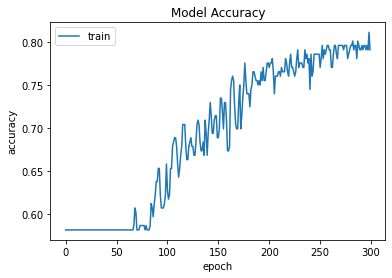

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

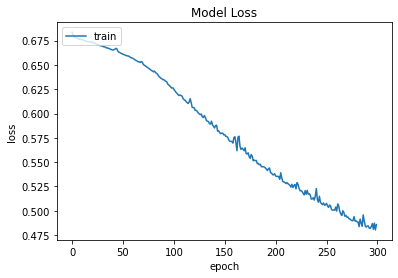

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
prediction = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
167    0
100    1
111    1
170    0
142    1
Name: target, Length: 107, dtype: int64

In [ ]:
y_test_arr = y_test.to_numpy()

In [ ]:
y_test_arr

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
prediction = prediction.reshape(107,)
# for i in len(prediction):
#   if prediction[i]>=0.5:
#     prediction[i] = 1
#   else:
#     prediction[i] = 0

In [ ]:
prediction[prediction>=0.5] = int(1)
prediction[prediction<0.5] = int(0)

In [ ]:
prediction = prediction.astype('int64')

In [ ]:
y_test_arr.reshape(107,)

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
nn_accuracy = accuracy_score(y_test_arr, prediction) * 100

We will calculate the accuracy after changing floating values into binary values based on the condition that if (prediction value >= 0.5), then the prediction is 1 --->"Yes Heart Disease" 
<p>else</p>
prediction is 0 --->"No Heart Disease"

In [ ]:
nn_accuracy

51.4018691588785

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 7)                 98        
                                                                 
 dense_2 (Dense)             (None, 3)                 24        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 308
Trainable params: 308
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_y = np.array([[67,1,0,160,286,0, 0,108,1,1.5,1,3,2]])

In [ ]:
new_y

array([[ 67. ,   1. ,   0. , 160. , 286. ,   0. ,   0. , 108. ,   1. ,
          1.5,   1. ,   3. ,   2. ]])

In [ ]:
def check_prediction(x):
  if x >= 0.5:
    print('1, YES heart disease')
  else:
    print('0, NO heart disease')


In [ ]:
p = model.predict(new_y)
check_prediction(p[0][0])

1/1 [==============================] - 0s 88ms/step
0, NO heart disease


In [ ]:
layer_1_1 = keras.layers.Dense(units=13, activation='linear')
layer_2_1 = keras.layers.Dense(units=7, activation='linear')
layer_3_1 = keras.layers.Dense(units=3, activation='linear')
layer_output2 = keras.layers.Dense(units=1, activation='sigmoid')

In [ ]:
model2 = tf.keras.Sequential([layer_1_1, layer_2_1, layer_3_1, layer_output2])
model2.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics='accuracy')

In [ ]:
history2 = model2.fit(x_train,y_train,epochs=300)

Epoch 1/300
7/7 [==============================] - 1s 3ms/step - loss: 11.3594 - accuracy: 0.6327
Epoch 2/300
7/7 [==============================] - 0s 3ms/step - loss: 5.0253 - accuracy: 0.6480
Epoch 3/300
7/7 [==============================] - 0s 4ms/step - loss: 7.3248 - accuracy: 0.6224
Epoch 4/300
7/7 [==============================] - 0s 3ms/step - loss: 3.9514 - accuracy: 0.6735
Epoch 5/300
7/7 [==============================] - 0s 3ms/step - loss: 3.2401 - accuracy: 0.6327
Epoch 6/300
7/7 [==============================] - 0s 3ms/step - loss: 2.4005 - accuracy: 0.7194
Epoch 7/300
7/7 [==============================] - 0s 4ms/step - loss: 2.1697 - accuracy: 0.6786
Epoch 8/300
7/7 [==============================] - 0s 3ms/step - loss: 2.2704 - accuracy: 0.6429
Epoch 9/300
7/7 [==============================] - 0s 5ms/step - loss: 1.6801 - accuracy: 0.7245
Epoch 10/300
7/7 [==============================] - 0s 4ms/step - loss: 1.5960 - accuracy: 0.7245
Epoch 11/300
7/7 [==========

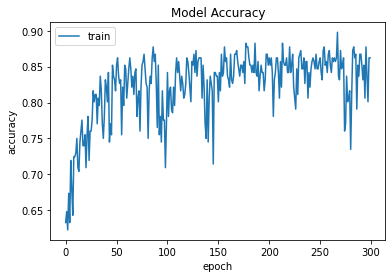

In [ ]:
plt.plot(history2.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

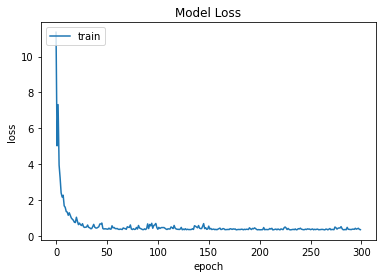

In [ ]:
plt.plot(history2.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
prediction2 = model2.predict(x_test)

4/4 [==============================] - 0s 4ms/step


In [ ]:
prediction2 = prediction2.reshape(107,)

In [ ]:
prediction2

array([4.35563624e-02, 6.35092139e-01, 3.28212768e-01, 7.24238873e-01,
       4.69406471e-02, 7.00064540e-01, 8.12536657e-01, 6.57710731e-01,
       8.97042394e-01, 4.33717556e-02, 9.56720293e-01, 2.51059700e-02,
       6.08800888e-01, 4.38724697e-01, 5.68085089e-02, 4.24338967e-01,
       5.11908578e-03, 4.99315793e-03, 8.98015618e-01, 9.38668773e-02,
       2.44498830e-02, 8.46985817e-01, 6.43124998e-01, 9.44083810e-01,
       4.33369465e-02, 2.85441130e-02, 4.32554446e-03, 8.44321698e-02,
       9.71867442e-01, 3.68694379e-03, 9.20756996e-01, 1.43009767e-01,
       1.22146728e-02, 2.17360616e-01, 5.35955327e-03, 9.70507786e-02,
       7.20255017e-01, 4.39176559e-01, 8.88526142e-01, 6.28691986e-02,
       1.12547755e-01, 2.35087201e-02, 7.21266150e-01, 6.51613533e-01,
       9.82382059e-01, 6.18842125e-01, 7.36533582e-01, 8.79255593e-01,
       7.53459275e-01, 6.61901176e-01, 4.34504062e-01, 8.99634600e-01,
       2.08257642e-02, 2.47570500e-01, 9.89022434e-01, 5.65862656e-01,
      

In [ ]:
prediction2[prediction2>=0.5] = int(1)
prediction2[prediction2<0.5] = int(0)
prediction2 = prediction2.astype('int64')

In [ ]:
prediction2

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [ ]:
nn_accuracy2 = accuracy_score(y_test_arr, prediction2) * 100

In [ ]:

nn_accuracy2

78.50467289719626

Now that we have seen an increase in accuracy after switching from relu to linear, let us try removing some features.

As we got same results by removing 6 columns in decision tree, let us try to remove fbs and train the model again.

In [ ]:
cols_to_drop = ['slope', 'fbs', 'exang', 'restecg', 'chol', 'age']

x_train = x_train.drop(cols_to_drop, axis=1)
x_test = x_test.drop(cols_to_drop, axis=1)

In [ ]:
x_train

,sex,cp,trestbps,thalach,oldpeak,ca,thal
196,1,2,150,147,3.6,0,2
157,1,1,122,174,0.0,0,2
212,1,0,118,140,1.2,0,3
68,1,1,120,170,0.0,0,2
276,1,0,146,105,2.0,1,3
...,...,...,...,...,...,...,...
156,1,2,130,179,0.0,0,2
123,0,2,108,167,0.0,0,2
15,0,2,120,158,1.6,0,2
125,0,1,118,192,0.7,0,2


In [ ]:
layer_1_2 = keras.layers.Dense(units=7, activation='linear')
layer_2_2 = keras.layers.Dense(units=4, activation='linear')
layer_output3 = keras.layers.Dense(units=1, activation='sigmoid')

model3 = tf.keras.Sequential([layer_1_2, layer_2_2, layer_output3])
model3.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics='accuracy')

In [ ]:
history3 = model3.fit(x_train,y_train,epochs=300)

Epoch 1/300
7/7 [==============================] - 1s 2ms/step - loss: 3.5455 - accuracy: 0.4133
Epoch 2/300
7/7 [==============================] - 0s 2ms/step - loss: 1.8436 - accuracy: 0.4592
Epoch 3/300
7/7 [==============================] - 0s 4ms/step - loss: 0.9574 - accuracy: 0.6276
Epoch 4/300
7/7 [==============================] - 0s 3ms/step - loss: 0.6384 - accuracy: 0.6990
Epoch 5/300
7/7 [==============================] - 0s 2ms/step - loss: 1.0153 - accuracy: 0.6429
Epoch 6/300
7/7 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.7347
Epoch 7/300
7/7 [==============================] - 0s 2ms/step - loss: 0.9104 - accuracy: 0.6582
Epoch 8/300
7/7 [==============================] - 0s 3ms/step - loss: 1.5586 - accuracy: 0.5969
Epoch 9/300
7/7 [==============================] - 0s 2ms/step - loss: 1.0577 - accuracy: 0.6224
Epoch 10/300
7/7 [==============================] - 0s 3ms/step - loss: 0.7062 - accuracy: 0.7296
Epoch 11/300
7/7 [===========

In [ ]:
prediction3 = model2.predict(x_test)
prediction3 = prediction2.reshape(107,)

4/4 [==============================] - 0s 4ms/step


In [ ]:
prediction3

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [ ]:
nn_accuracy3 = accuracy_score(y_test_arr, prediction3) * 100

In [ ]:
nn_accuracy3

78.50467289719626

In [ ]:
print("Accuracy with relu (13 features): ", nn_accuracy)
print("Accuracy with linear (13 features): ", nn_accuracy2)
print("Accuracy with linear (7 features): ", nn_accuracy3)

Accuracy with relu (13 features):  51.4018691588785
Accuracy with linear (13 features):  78.50467289719626
Accuracy with linear (7 features):  78.50467289719626


In [ ]:
y_test_arr

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
prediction2

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [ ]:
prediction3

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1])